<a href="https://colab.research.google.com/github/SaidAsma/DOCKERTP/blob/main/maladies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving maladie.csv to maladie.csv
Colonnes du dataset:
Index(['temperature', 'pouls', 'oxygene', 'glycemie', 'tension', 'label'], dtype='object')


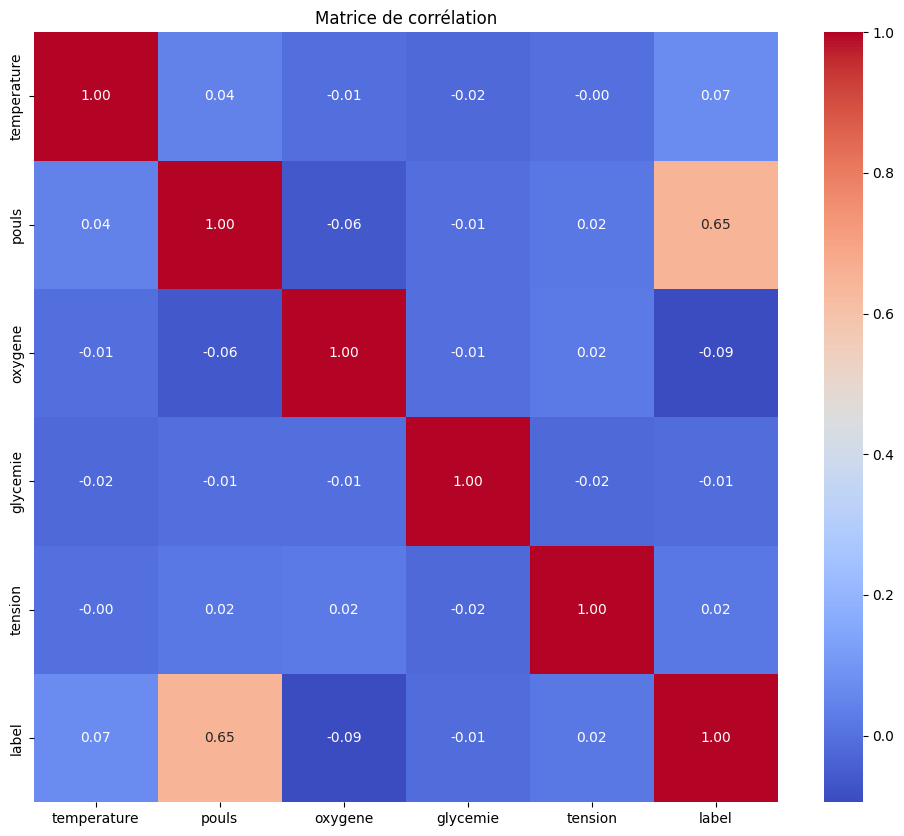

Meilleurs hyperparamètres pour DecisionTreeClassifier:
{'max_depth': 5, 'min_samples_split': 2}
Meilleurs hyperparamètres pour KNeighborsClassifier:
{'n_neighbors': 3, 'weights': 'distance'}

DecisionTreeClassifier:
Précision: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       510
         1.0       1.00      1.00      1.00       635

    accuracy                           1.00      1145
   macro avg       1.00      1.00      1.00      1145
weighted avg       1.00      1.00      1.00      1145


KNeighborsClassifier:
Précision: 0.993886462882096
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       510
         1.0       1.00      0.99      0.99       635

    accuracy                           0.99      1145
   macro avg       0.99      0.99      0.99      1145
weighted avg       0.99      0.99      0.99      1145

Epoch 1/10
144/144 [==============================] - 2s 7ms/st

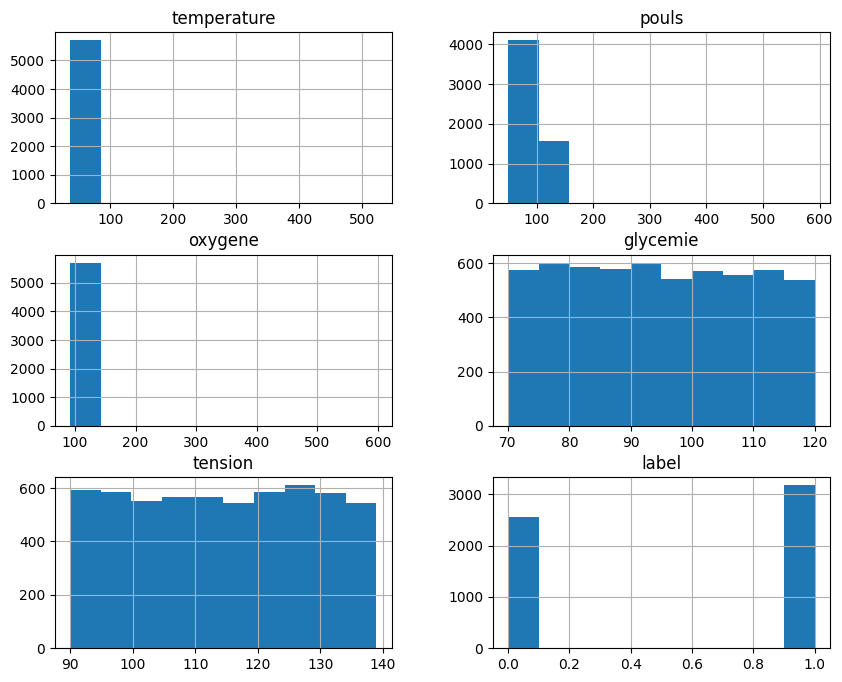

36/36 [==============================] - 0s 1ms/step


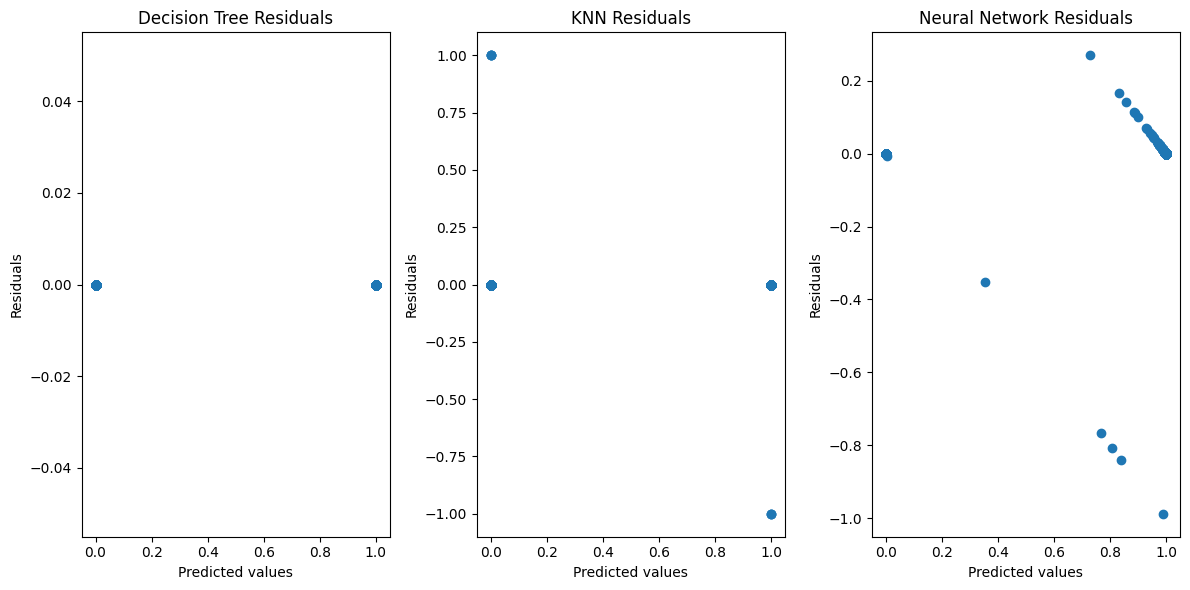

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Charger les données depuis le fichier CSV téléchargé
uploaded = files.upload()

# Utiliser le nom correct du fichier téléchargé
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

# Afficher les colonnes du dataset
print("Colonnes du dataset:")
print(data.columns)

# Calculer la matrice de corrélation
corr_matrix = data.corr()

# Afficher la matrice de corrélation
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()

# Gérer les valeurs manquantes
imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Séparer les caractéristiques et les labels
X = data_imputed.drop('label', axis=1)
y = data_imputed['label']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialiser les modèles
dt_model = DecisionTreeClassifier(random_state=42)
knn_model = KNeighborsClassifier()
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Définir les hyperparamètres à tester pour chaque modèle
dt_param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10]
}

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

# Recherche des meilleurs hyperparamètres pour DecisionTreeClassifier
dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train, y_train)

# Recherche des meilleurs hyperparamètres pour KNeighborsClassifier
knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=5, scoring='accuracy')
knn_grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres pour chaque modèle
print("Meilleurs hyperparamètres pour DecisionTreeClassifier:")
print(dt_grid_search.best_params_)

print("Meilleurs hyperparamètres pour KNeighborsClassifier:")
print(knn_grid_search.best_params_)

# Prédictions et évaluation pour DecisionTreeClassifier
dt_best_model = dt_grid_search.best_estimator_
y_pred_dt = dt_best_model.predict(X_test)
print("\nDecisionTreeClassifier:")
print("Précision:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Prédictions et évaluation pour KNeighborsClassifier
knn_best_model = knn_grid_search.best_estimator_
y_pred_knn = knn_best_model.predict(X_test)
print("\nKNeighborsClassifier:")
print("Précision:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# Entraînement du réseau de neurones
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Prédictions et évaluation pour le réseau de neurones
nn_loss, nn_accuracy = nn_model.evaluate(X_test, y_test)
print("\nRéseau de neurones:")
print("Perte:", nn_loss)
print("Précision:", nn_accuracy)

# Affichage des histogrammes des caractéristiques
data.hist(figsize=(10, 8))
plt.show()

# Calculer les résidus pour chaque modèle
dt_residuals = y_test - y_pred_dt
knn_residuals = y_test - y_pred_knn
nn_residuals = y_test - nn_model.predict(X_test).flatten()

# Afficher les graphiques des résidus pour chaque modèle
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.scatter(y_pred_dt, dt_residuals)
plt.title('Decision Tree Residuals')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

plt.subplot(1, 3, 2)
plt.scatter(y_pred_knn, knn_residuals)
plt.title('KNN Residuals')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

plt.subplot(1, 3, 3)
plt.scatter(nn_model.predict(X_test), nn_residuals)
plt.title('Neural Network Residuals')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()
